In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
# Loss function : Log likelihood
def compute_loss(y, hx):
    return -np.mean(y * np.log(hx) + (1-y)* np.log(1-hx))

In [ ]:
# Gradient of the loss in Matrix form
# X.T means X transpose
# y.shape[0] means n - number of data points
def compute_gradient(X, y, hx):
    return np.dot(X.T , (hx - y))/ y.shape[0]

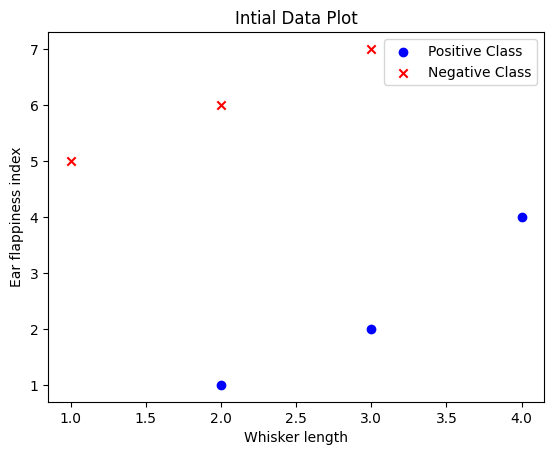

In [5]:
# Dataset
X = np.array([
    [2,1], [3,2], [4, 4],  # Positive Examples
    [1,5], [2, 6], [3, 7]  # Negative Examples
])

y = np.array([1, 1, 1, 0, 0, 0])  # Labels 

# Plot initial data
plt.scatter(X[:3, 0], X[:3, 1], color='blue', marker='o', label='Positive Class')
plt.scatter(X[3:, 0], X[3:, 1], color='red', marker='x', label='Negative Class')
plt.xlabel('Whisker length')
plt.ylabel('Ear flappiness index')
plt.legend()
plt.title('Intial Data Plot')
plt.show()
 

In [32]:
# Logistic Regression Model
def logistic_regression(X, y, learning_rate=0.01, num_iterations=100):
    # Add intercept term of X
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Initialize weights
    weights = np.zeros(X.shape[1])

    # gradient descent
    for i in range(num_iterations):
        z = np.dot(X, weights)
        hx = sigmoid(z) # hypothesis
        loss = compute_loss(y, hx) # Loss function
        gradient = compute_gradient(X, y, hx) # gradient
        weights -=learning_rate * gradient

        if i%10 == 0:
         plot_decision_boundary(X, y , weights, loss, i)
         print(f'Iteration {i}: Theta={weights}, Loss={loss}')
    
    return weights

In [33]:
# Plotting the decision Boundary 
def plot_decision_boundary(X, y, weights, loss, iteration):
  plt.scatter(X[y == 1, 1], X[y == 1, 2], color='blue', marker='o', label='Positive Class' if iteration == 0 else "")
  plt.scatter(X[y == 0, 1], X[y == 0, 2], color='red', marker='x', label='Negative Class' if iteration == 0 else "")

  # Extend the x values a bit beyond the minimum and maximum values of the dataset
  x_values = np.array([np.min(X[:, 1]) - 1,  np.max(X[:, 1]) + 1])
  y_values = -(weights[0] + weights[1] * x_values) / weights[2]
  plt.plot(x_values, y_values, 'k')

  plt.xlim(x_values[0], x_values[1])
  plt.ylim(np.min(X[:, 2]) -1 , np.max(X[:, 2]) + 1 )
  plt.xlabel('Whisker length')
  plt.ylabel('Ear flappiness index')
  plt.title(f'Decision Boundary at iteration {iteration} \nLoss:{loss}')
  if iteration == 0:
    plt.legend()
  plt.show()
  


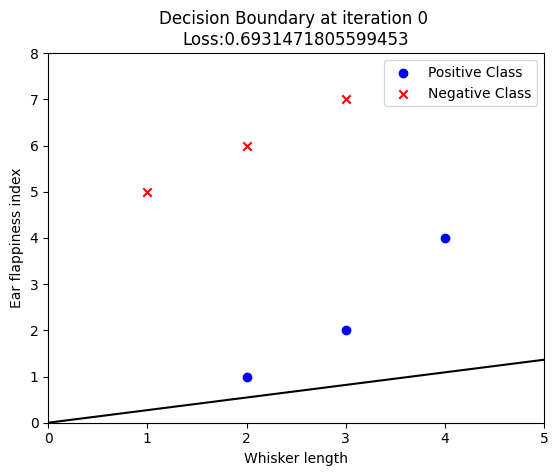

Iteration 0: Theta=[ 0.          0.0025     -0.00916667], Loss=0.6931471805599453


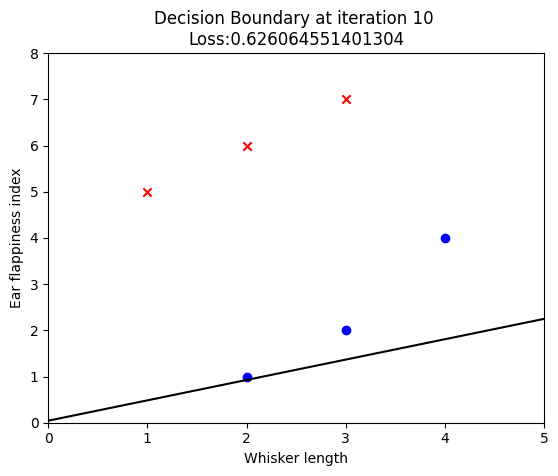

Iteration 10: Theta=[ 0.00351898  0.03583314 -0.08124515], Loss=0.626064551401304


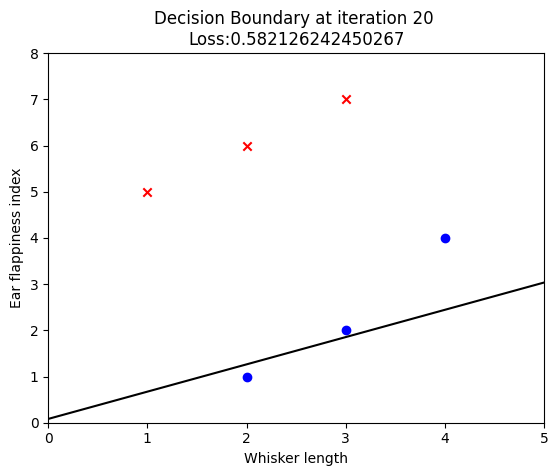

Iteration 20: Theta=[ 0.0107534   0.07750049 -0.13121449], Loss=0.582126242450267


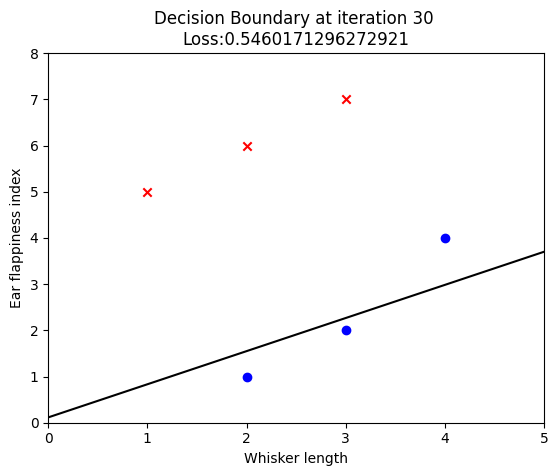

Iteration 30: Theta=[ 0.01952555  0.12200009 -0.17007813], Loss=0.5460171296272921


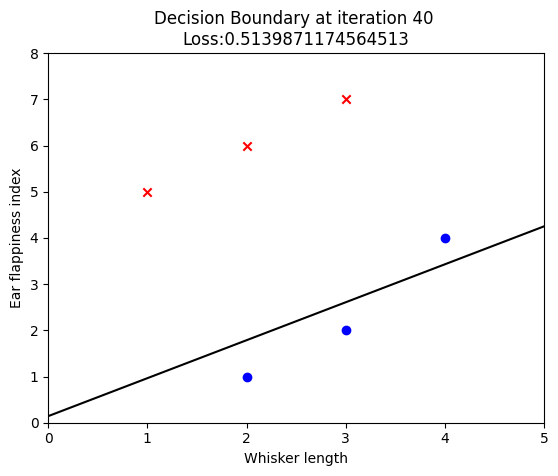

Iteration 40: Theta=[ 0.02882972  0.16681759 -0.20296236], Loss=0.5139871174564513


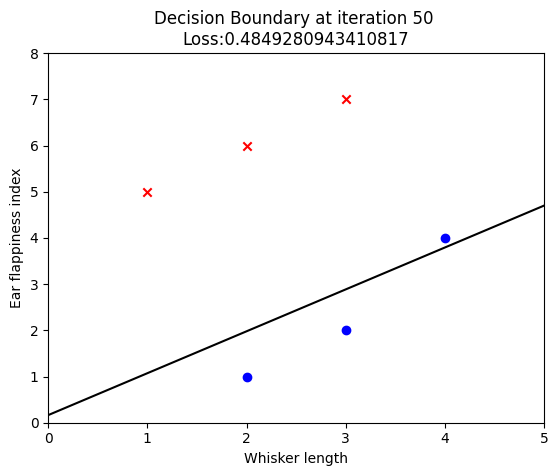

Iteration 50: Theta=[ 0.03819345  0.21079708 -0.23234289], Loss=0.4849280943410817


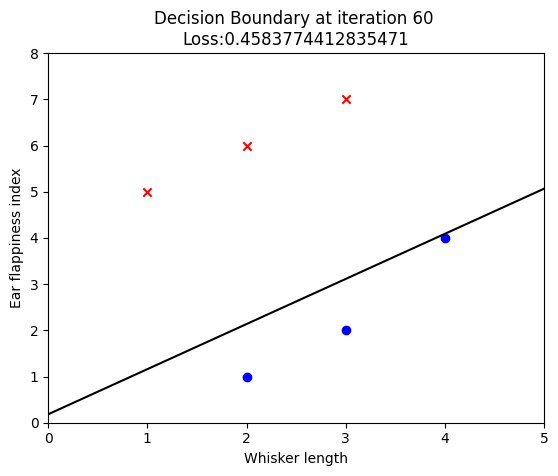

Iteration 60: Theta=[ 0.04739475  0.25342232 -0.25946218], Loss=0.4583774412835471


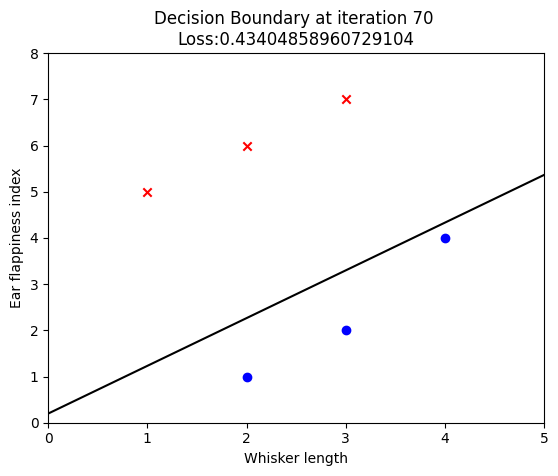

Iteration 70: Theta=[ 0.05633317  0.29448797 -0.28496725], Loss=0.43404858960729104


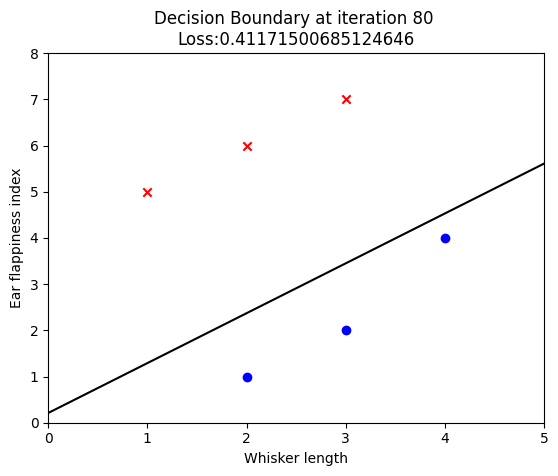

Iteration 80: Theta=[ 0.0649683   0.33394185 -0.30920989], Loss=0.41171500685124646


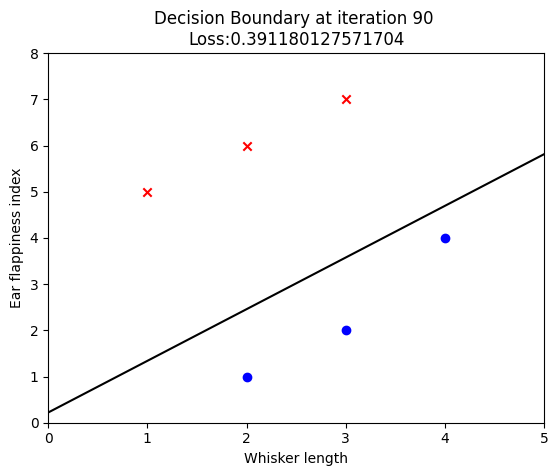

Iteration 90: Theta=[ 0.07328952  0.37180678 -0.33239254], Loss=0.391180127571704


In [34]:
# Training the Model
weights = logistic_regression(X, y)